# Machine Learning Solution for Data-driven Crime Analytics in South Africa

**Student Name:** Thando Maxhegwana  
**Student Number:** 22430210  
**Examiner:** Mr X Piyose  
**Level:** Technical Programming 2  
**Department:** Information and Communication Technology  
**Qualification:**Diploma: Information Technology
---

## 🧠 Examination Overview

This notebook presents a complete end-to-end solution to the problem of **data-driven crime analysis and forecasting in South Africa**.  
The primary objectives are:

1. **Classification of Crime Hotspots:**  
   Build a supervised machine learning model to predict whether a police precinct qualifies as a crime hotspot, based on historical crime data and contextual features.

2. **Forecasting Crime Trends Over Time:**  
   Develop a time series forecasting model (covering 12–24 months) to predict crime trends for a selected category and geographic area, visualizing results with confidence intervals.

3. **Data Visualization and Dashboard Development:**  
   Create interactive data visualizations and a Streamlit dashboard to allow users to filter by crime type, province, and time period.

4. **Drone Simulation Concept:**  
   Propose a Python-based simulation to generate waypoints for drones to patrol identified hotspots in a grid-based 3D environment.

---

## 📊 Data Sources

Two multi-relational datasets are used:
- **SouthAfricaCrimeStats_v2_dirty.csv:** Historical crime counts per station, category, and year.  
- **ProvincePopulation_dirty.csv:** Demographic context (population, area, density) per province.

Both datasets are intentionally unclean to simulate real-world preprocessing challenges.

---

## ⚙️ Tools & Environment

All code is executed using **Python 3** in **Google Colab**, leveraging:
- `pandas` for data handling  
- `matplotlib` and `seaborn` for visualization  
- `scikit-learn` for machine learning  
- `statsmodels` for forecasting  
- `streamlit` for interactive dashboards  

---

## 🎯 Expected Outcomes

By the end of this notebook, I will:
- Acquire, justify, clean, and preprocess real datasets.  
- Explore and visualize patterns in South African crime data.  
- Build a classification model for hotspot detection.  
- Produce a forecast of future crime trends with interpretation.  
- Discuss a drone patrol simulation concept for hotspot monitoring.  
- Present evaluation metrics and recommendations for improvement.

---


# 📂 Data Acquisition and Justification

In this section, we import and describe the datasets used in the project **“A Machine Learning Solution for Data-Driven Crime in South Africa.”**

We use two complementary datasets:

1. **SouthAfricaCrimeStats_v2_dirty.csv**  
   - Contains historical crime data across South African provinces and police stations.  
   - Includes multiple crime categories and annual counts over several years.  
   - Used for **crime hotspot classification** and **trend forecasting**.

2. **ProvincePopulation_dirty.csv**  
   - Provides population, area, and density data by province.  
   - Used to normalize crime counts (e.g., per 100,000 residents) and analyze socio-demographic relationships.

These datasets are realistic, multi-relational, and interconnected through the common key: **Province**.


In [53]:
# Import the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


## 🔄 Loading the Datasets

We will now load the two datasets into our Colab environment.

Both files are the deliberately “dirty” versions to simulate real-world data challenges.  
We’ll inspect the first few rows to understand their structure and confirm that they loaded correctly.


In [54]:
# Load the unclean datasets (make sure they are uploaded to Colab first)
crime_data = pd.read_csv("/content/drive/MyDrive/SouthAfricaCrimeStats_v2_dirty.csv")
pop_data = pd.read_csv("/content/drive/MyDrive/ProvincePopulation_dirty.csv")

# Display first few rows of each dataset
print("=== Crime Dataset Preview ===")
display(crime_data.head())

print("\n=== Population Dataset Preview ===")
display(pop_data.head())


=== Crime Dataset Preview ===


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,WESTERN CAPE,Cape Town Central,All theft not mentioned elsewhere,6692.0,6341.0,5966.0,5187.0,4985.0,5127.0,5285.0,5937.0,5600.0,5335.0,5176.0
1,gauteng,Jhb Central,All thft not mentioned elsewhere,6093.0,4602.0,3761.0,3610.0,3267.0,3037.0,2886.0,2638.0,2809.0,3050.0,2434.0
2,western cape,Mitchells Plain,All theft not mentioned elsewhere,5341.0,6093.0,NaN,6803.0,6035.0,5761.0,6108.0,5514.0,4975.0,4043.0,3635.0
3,FREE STATE,Park Road,All theft not mentioned elsewhere,5108.0,4282.0,3834.0,3316.0,3101.0,NaN,2679.0,3116.0,2927.0,2297.0,2103.0
4,gauteng,Pretoria Central,All theft not mentioned elsewhere,5099.0,4536.0,3309.0,2694.0,2616.0,2606.0,2635.0,3226.0,3246.0,2892.0,3030.0



=== Population Dataset Preview ===


,Province,Population,Area,Density
0,Gauteng,12272263.0,18178.0,675.1
1,Kwazulu/Natal,10267300.0,94361.0,108.8
2,Mpumalanga,4039939.0,76495.0,52.8
3,Western Cape,5822734.0,129462.0,45.0
4,Limpopo,5404868.0,125755.0,43.0


## 🧩 Understanding the Data Structure

Let’s examine the structure (shape, columns, and data types) of each dataset.  
This helps us understand what features are available for analysis and modeling.


In [55]:
# Show basic information about the datasets
print("=== Crime Dataset Info ===")
crime_data.info()

print("\n=== Population Dataset Info ===")
pop_data.info()


=== Crime Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30911 entries, 0 to 30910
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   30911 non-null  object 
 1   Station    30911 non-null  object 
 2   Category   30911 non-null  object 
 3   2005-2006  30293 non-null  float64
 4   2006-2007  30292 non-null  float64
 5   2007-2008  30292 non-null  float64
 6   2008-2009  30292 non-null  float64
 7   2009-2010  30291 non-null  float64
 8   2010-2011  30294 non-null  float64
 9   2011-2012  30293 non-null  float64
 10  2012-2013  30293 non-null  float64
 11  2013-2014  30294 non-null  float64
 12  2014-2015  30294 non-null  float64
 13  2015-2016  30294 non-null  float64
dtypes: float64(11), object(3)
memory usage: 3.3+ MB

=== Population Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtyp

## 🎯 Dataset Justification

- **Crime Dataset:**  
  - Contains multi-year crime counts by *province*, *station*, and *category*.  
  - Enables both **spatial** (where crimes occur) and **temporal** (when crimes occur) analysis.  
  - Suitable for **classification** (hotspot vs non-hotspot) and **forecasting** (crime trend prediction).  

- **Population Dataset:**  
  - Provides contextual socio-economic features.  
  - Allows normalization (e.g., crime rate per population density).  
  - Facilitates richer interpretation of hotspot patterns.  

Both datasets are **multi-relational** (linked via the “Province” field), allowing us to merge and analyze crime behavior relative to demographic and spatial context.  
This combination reflects real-world data integration in law enforcement analytics.


## 🧹 Initial Data Quality Check

Before we move on to cleaning, we perform a quick assessment of:
- Missing values  
- Duplicate records  

This helps us understand how “dirty” the data is and prepares us for preprocessing.


In [56]:
# Check for missing values
print("=== Missing Values in Crime Dataset ===")
display(crime_data.isnull().sum())

print("\n=== Missing Values in Population Dataset ===")
display(pop_data.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in Crime Dataset:", crime_data.duplicated().sum())
print("Duplicate rows in Population Dataset:", pop_data.duplicated().sum())


=== Missing Values in Crime Dataset ===


,0
Province,0
Station,0
Category,0
2005-2006,618
2006-2007,619
2007-2008,619
2008-2009,619
2009-2010,620
2010-2011,617
2011-2012,618



=== Missing Values in Population Dataset ===


,0
Province,0
Population,3
Area,1
Density,1



Duplicate rows in Crime Dataset: 50
Duplicate rows in Population Dataset: 0


# 🧹 Data Understanding, Cleaning, and Preprocessing

In this section, we aim to make our datasets ready for analysis and modeling.  
The main objectives are:

1. **Understand data quality issues** (missing values, duplicates, inconsistent text, and outliers).  
2. **Clean the data** by handling missing entries, duplicates, and formatting errors.  
3. **Preprocess** the data into a structured, analysis-friendly form suitable for classification and forecasting.  
4. **Merge** the two datasets (Crime and Population) into a unified dataset using the `Province` key.

Cleaning is crucial because real-world datasets often contain irregularities such as inconsistent capitalization, missing data, typos, or extra whitespace.


## 🔍 Step 1: Initial Data Overview

Let’s review key statistics and identify any inconsistencies.  
We’ll look at descriptive statistics and unique values in important columns like *Province*, *Station*, and *Category*.


In [57]:
# Overview of datasets
print("=== Crime Dataset Summary ===")
display(crime_data.describe(include='all').T)

print("\n=== Population Dataset Summary ===")
display(pop_data.describe(include='all').T)

# Unique value counts
print("\nUnique Provinces in Crime Data:", crime_data['Province'].nunique())
print("Unique Provinces in Population Data:", pop_data['Province'].nunique())


=== Crime Dataset Summary ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province,30911,18,eastern cape,3664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Station,30911,2284,Harrismith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,30911,29,Sexual offences as result of police action,1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-2006,30293.0,NaN,NaN,NaN,70.500512,206.192995,0.0,0.0,7.0,49.0,6692.0
2006-2007,30292.0,NaN,NaN,NaN,69.348244,198.529307,0.0,0.0,8.0,50.0,6341.0
2007-2008,30292.0,NaN,NaN,NaN,67.166876,183.797302,0.0,0.0,8.0,50.0,5966.0
2008-2009,30292.0,NaN,NaN,NaN,68.738347,187.843541,0.0,0.0,9.0,52.0,6803.0
2009-2010,30291.0,NaN,NaN,NaN,69.511043,185.578705,0.0,1.0,9.0,54.0,6571.0
2010-2011,30294.0,NaN,NaN,NaN,67.556249,180.695379,0.0,0.25,9.0,52.0,6260.0
2011-2012,30293.0,NaN,NaN,NaN,68.285181,182.775323,0.0,1.0,10.0,53.0,6108.0



=== Population Dataset Summary ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province,10,10,Gauteng,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,7.0,NaN,NaN,NaN,5956936.428571,3998321.428387,1145861.0,3392764.5,5404868.0,8045017.0,12272263.0
Area,9.0,NaN,NaN,NaN,135645.888889,98433.269257,18178.0,94361.0,125755.0,129825.0,372889.0
Density,9.0,NaN,NaN,NaN,113.466667,212.56459,3.1,33.5,43.0,52.8,675.1



Unique Provinces in Crime Data: 18
Unique Provinces in Population Data: 10


## 🧽 Step 2: Clean Text Columns

We will:
- Remove extra whitespace.
- Standardize text casing (convert to title case).
- Correct spelling and symbol inconsistencies (e.g., “thft” → “theft”, “@” → “a”).
- Ensure `Province` names match across both datasets for merging later.


In [58]:
# Define cleaning functions
def clean_text(x):
    if isinstance(x, str):
        x = x.strip().title()          # Title case
        x = x.replace("Thft", "Theft") # Correct common typo
        x = x.replace("@", "a")        # Replace symbols
        return x
    return x

# Apply cleaning to text columns
text_cols_crime = ['Province', 'Station', 'Category']
crime_data[text_cols_crime] = crime_data[text_cols_crime].applymap(clean_text)

pop_data['Province'] = pop_data['Province'].apply(clean_text)

# Preview cleaned columns
print("=== Cleaned Crime Data Columns ===")
display(crime_data[text_cols_crime].head())

print("\n=== Cleaned Population Data ===")
display(pop_data.head())


=== Cleaned Crime Data Columns ===


,Province,Station,Category
0,Western Cape,Cape Town Central,All Theft Not Mentioned Elsewhere
1,Gauteng,Jhb Central,All Theft Not Mentioned Elsewhere
2,Western Cape,Mitchells Plain,All Theft Not Mentioned Elsewhere
3,Free State,Park Road,All Theft Not Mentioned Elsewhere
4,Gauteng,Pretoria Central,All Theft Not Mentioned Elsewhere



=== Cleaned Population Data ===


,Province,Population,Area,Density
0,Gauteng,12272263.0,18178.0,675.1
1,Kwazulu/Natal,10267300.0,94361.0,108.8
2,Mpumalanga,4039939.0,76495.0,52.8
3,Western Cape,5822734.0,129462.0,45.0
4,Limpopo,5404868.0,125755.0,43.0


## 🩹 Step 3: Handle Missing Values

We’ll identify and impute missing data:
- For numerical columns (crime counts, population, area), we use the **median** or **mean**.
- For categorical columns (province, category), we fill missing values with `"Unknown"`.


In [59]:
# Fill missing values in numeric columns with median
crime_data = crime_data.fillna(crime_data.median(numeric_only=True))
pop_data['Population'] = pop_data['Population'].fillna(pop_data['Population'].median())
pop_data['Area'] = pop_data['Area'].fillna(pop_data['Area'].median())
pop_data['Density'] = pop_data['Density'].fillna(pop_data['Density'].median())

# Fill missing text with "Unknown"
crime_data = crime_data.fillna("Unknown")
pop_data = pop_data.fillna("Unknown")

print("Missing values after cleaning:")
print("Crime Data Missing:\n", crime_data.isnull().sum().sum())
print("Population Data Missing:\n", pop_data.isnull().sum().sum())


Missing values after cleaning:
Crime Data Missing:
 0
Population Data Missing:
 0


## 🗑️ Step 4: Remove Duplicates

Duplicates can distort model training and summary statistics.  
We’ll remove duplicate rows from both datasets and verify the result.


In [60]:
# Remove duplicate rows
initial_crime_rows = crime_data.shape[0]
crime_data.drop_duplicates(inplace=True)
final_crime_rows = crime_data.shape[0]

initial_pop_rows = pop_data.shape[0]
pop_data.drop_duplicates(inplace=True)
final_pop_rows = pop_data.shape[0]

print(f"Removed {initial_crime_rows - final_crime_rows} duplicate rows from Crime Data.")
print(f"Removed {initial_pop_rows - final_pop_rows} duplicate rows from Population Data.")


Removed 50 duplicate rows from Crime Data.
Removed 0 duplicate rows from Population Data.


## 🔗 Step 5: Merge Crime and Population Datasets

Now that both datasets are clean, we merge them on the **Province** column.  
This gives us a combined dataset linking crime rates to demographic context.


In [61]:
# Merge datasets on Province
merged_data = pd.merge(crime_data, pop_data, on="Province", how="left")

print("Merged Dataset Shape:", merged_data.shape)
display(merged_data.head())


Merged Dataset Shape: (30861, 17)


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Population,Area,Density
0,Western Cape,Cape Town Central,All Theft Not Mentioned Elsewhere,6692.0,6341.0,5966.0,5187.0,4985.0,5127.0,5285.0,5937.0,5600.0,5335.0,5176.0,5822734.0,129462.0,45.0
1,Gauteng,Jhb Central,All Theft Not Mentioned Elsewhere,6093.0,4602.0,3761.0,3610.0,3267.0,3037.0,2886.0,2638.0,2809.0,3050.0,2434.0,12272263.0,18178.0,675.1
2,Western Cape,Mitchells Plain,All Theft Not Mentioned Elsewhere,5341.0,6093.0,8.0,6803.0,6035.0,5761.0,6108.0,5514.0,4975.0,4043.0,3635.0,5822734.0,129462.0,45.0
3,Free State,Park Road,All Theft Not Mentioned Elsewhere,5108.0,4282.0,3834.0,3316.0,3101.0,9.0,2679.0,3116.0,2927.0,2297.0,2103.0,2745590.0,129825.0,21.1
4,Gauteng,Pretoria Central,All Theft Not Mentioned Elsewhere,5099.0,4536.0,3309.0,2694.0,2616.0,2606.0,2635.0,3226.0,3246.0,2892.0,3030.0,12272263.0,18178.0,675.1


## 🧮 Step 6: Feature Engineering

To support analysis and modeling:
- Compute total crime counts per station.
- Create a normalized **crime rate per 100,000 people** feature.
- Convert year columns into long format for time series forecasting.


In [62]:
# Create total crime feature
year_cols = [col for col in merged_data.columns if "-" in col]
merged_data["Total_Crime"] = merged_data[year_cols].sum(axis=1)

# Create crime rate per 100k population
merged_data["Crime_Rate_per_100k"] = (merged_data["Total_Crime"] / merged_data["Population"]) * 100000

# Preview engineered data
display(merged_data[["Province", "Station", "Category", "Total_Crime", "Crime_Rate_per_100k"]].head())


,Province,Station,Category,Total_Crime,Crime_Rate_per_100k
0,Western Cape,Cape Town Central,All Theft Not Mentioned Elsewhere,61631.0,1058.454671
1,Gauteng,Jhb Central,All Theft Not Mentioned Elsewhere,38187.0,311.165105
2,Western Cape,Mitchells Plain,All Theft Not Mentioned Elsewhere,54316.0,932.826401
3,Free State,Park Road,All Theft Not Mentioned Elsewhere,32772.0,1193.623229
4,Gauteng,Pretoria Central,All Theft Not Mentioned Elsewhere,35889.0,292.439952


## 💾 Step 7: Save Cleaned and Preprocessed Data

We’ll now save the cleaned and merged dataset for future use in classification and forecasting steps.


In [63]:
# Save cleaned dataset
merged_data.to_csv("Cleaned_Crime_Data.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Crime_Data.csv'")


✅ Cleaned dataset saved as 'Cleaned_Crime_Data.csv'


# 🔎 Exploratory Data Analysis (EDA)

In this section, we explore the cleaned crime dataset to uncover insights about crime patterns in South Africa.  
The goals of this EDA are to:

1. Understand the **distribution of crimes** across provinces, years, and categories.  
2. Identify **top contributing crime categories** and **stations**.  
3. Explore relationships between **crime rates** and **population size**.  
4. Visualize **temporal trends** and **spatial hotspots** to support the classification and forecasting phases.

Visualizations will be created using `matplotlib` and `seaborn`.


## 🧾 Step 1: Summary Statistics and Structure

We start with a summary of the cleaned dataset to confirm that our cleaning was successful and to check the range of key features.


In [64]:
# Basic summary of dataset
print("=== Dataset Shape ===")
print(merged_data.shape)

print("\n=== Columns ===")
print(list(merged_data.columns))

print("\n=== Statistical Summary ===")
display(merged_data.describe(include='all').T)


=== Dataset Shape ===
(30861, 19)

=== Columns ===
['Province', 'Station', 'Category', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', 'Population', 'Area', 'Density', 'Total_Crime', 'Crime_Rate_per_100k']

=== Statistical Summary ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province,30861,9,Eastern Cape,5292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Station,30861,1143,Lwandle,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,30861,27,All Theft Not Mentioned Elsewhere,1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-2006,30861.0,NaN,NaN,NaN,69.268462,204.431029,0.0,0.0,7.0,47.0,6692.0
2006-2007,30861.0,NaN,NaN,NaN,68.150935,196.816594,0.0,0.0,8.0,48.0,6341.0
2007-2008,30861.0,NaN,NaN,NaN,66.009397,182.226091,0.0,0.0,8.0,48.0,5966.0
2008-2009,30861.0,NaN,NaN,NaN,67.572697,186.229033,0.0,1.0,9.0,50.0,6803.0
2009-2010,30861.0,NaN,NaN,NaN,68.332653,184.00145,0.0,1.0,9.0,52.0,6571.0
2010-2011,30861.0,NaN,NaN,NaN,66.420207,179.15866,0.0,1.0,9.0,50.0,6260.0
2011-2012,30861.0,NaN,NaN,NaN,67.147014,181.194007,0.0,1.0,10.0,51.0,6108.0


## 🗺️ Step 2: Total Crimes by Province

We visualize total crimes per province to identify which regions report higher crime counts.  
This gives insight into **regional disparities** and helps us later classify **crime hotspots**.


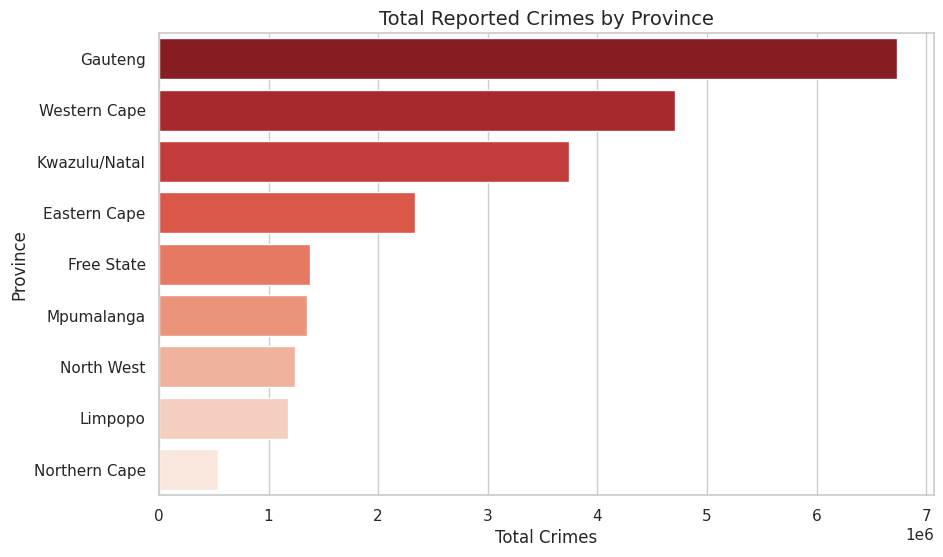

In [65]:
# Aggregate total crime by province
province_crime = merged_data.groupby("Province")["Total_Crime"].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=province_crime.values, y=province_crime.index, palette="Reds_r")
plt.title("Total Reported Crimes by Province", fontsize=14)
plt.xlabel("Total Crimes")
plt.ylabel("Province")
plt.show()


## 🔝 Step 3: Top 10 Crime Categories Nationwide

We’ll now identify the most frequent crime categories across the country.  
This helps in selecting a **target category** for forecasting in later steps.


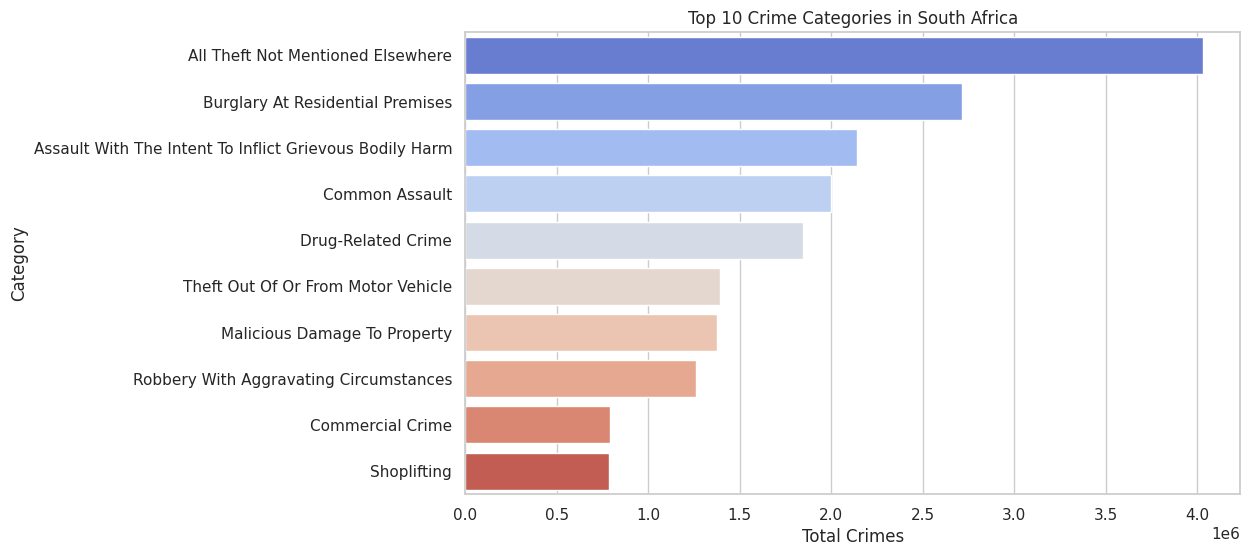

In [66]:
# Top crime categories
category_crime = merged_data.groupby("Category")["Total_Crime"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=category_crime.values, y=category_crime.index, palette="coolwarm")
plt.title("Top 10 Crime Categories in South Africa")
plt.xlabel("Total Crimes")
plt.ylabel("Category")
plt.show()


## 📈 Step 4: Relationship Between Population and Crime Rate

We analyze whether larger populations are associated with higher crime rates.  
This helps us understand whether population density influences criminal activity.


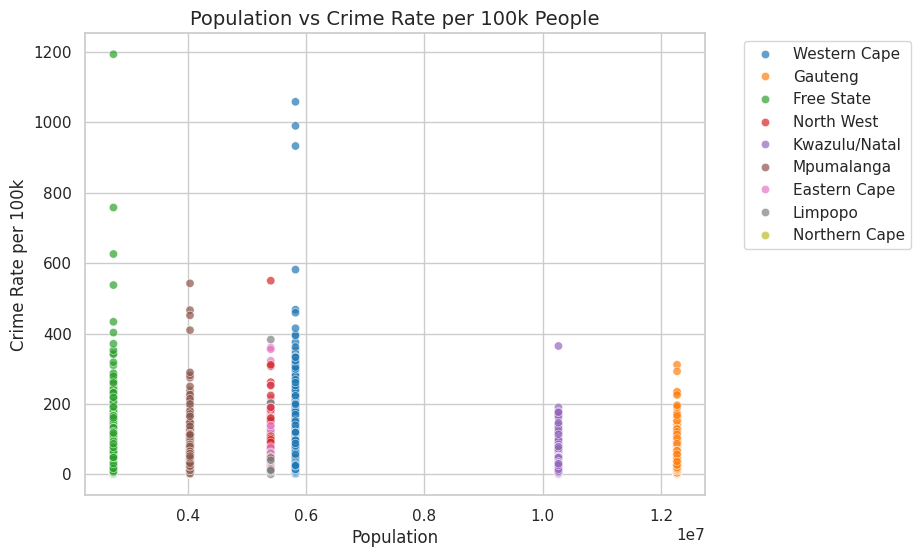

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Population",
    y="Crime_Rate_per_100k",
    hue="Province",
    data=merged_data,
    palette="tab10",
    alpha=0.7
)
plt.title("Population vs Crime Rate per 100k People", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Crime Rate per 100k")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## ⏳ Step 5: Temporal Trends of Crime Over Time

We’ll convert the year columns into a long format and visualize how total crime counts have changed over the years.  
This will help identify **seasonal patterns**, **policy effects**, or **long-term trends** in crime.


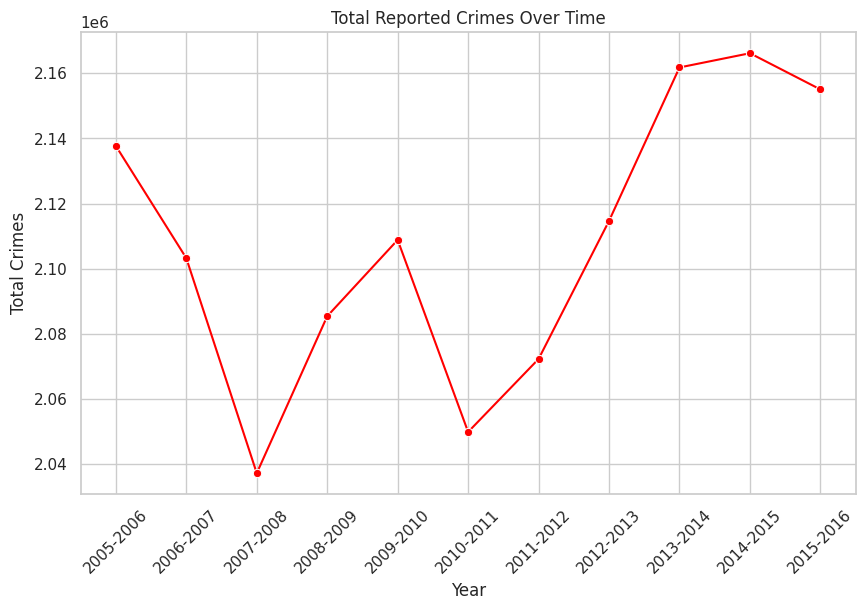

In [68]:
# Convert wide year columns into long format
year_cols = [col for col in merged_data.columns if "-" in col]

crime_long = merged_data.melt(
    id_vars=["Province", "Station", "Category"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Crime_Count"
)

# Aggregate by year
yearly_trend = crime_long.groupby("Year")["Crime_Count"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x="Year", y="Crime_Count", marker="o", color="red")
plt.title("Total Reported Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.show()


## 📉 Step 6: Provincial Crime Trends Over Time

We’ll compare how crime has evolved in each province across years to detect regional differences in trends.


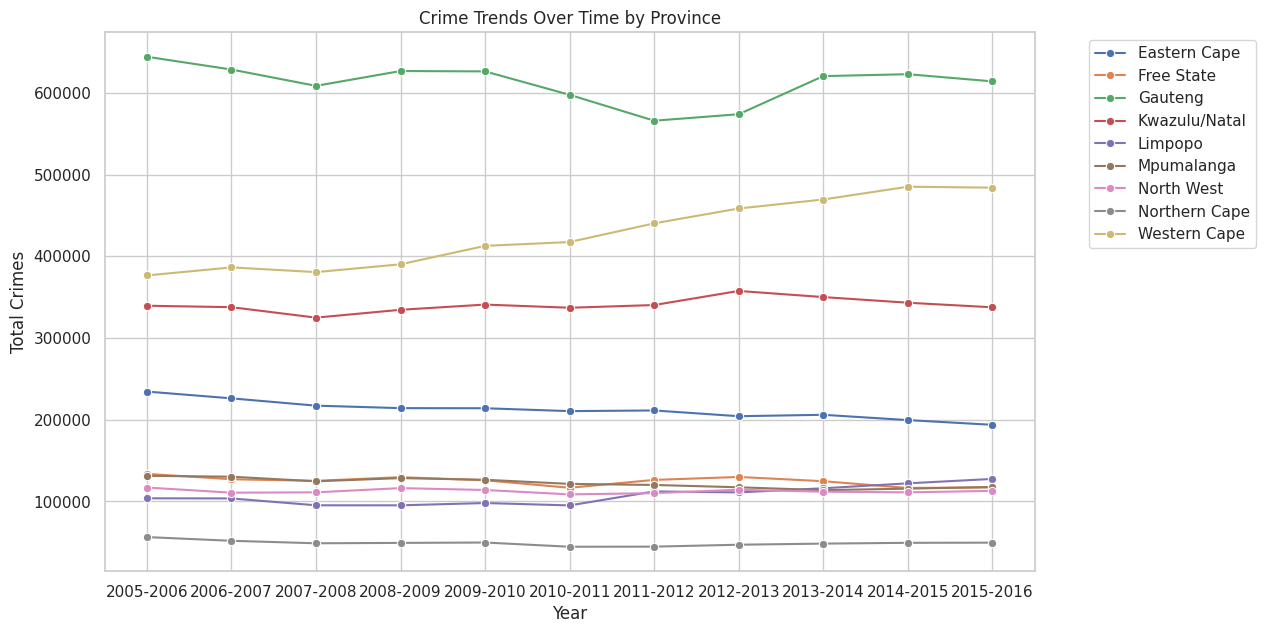

In [69]:
# Aggregate by province and year
prov_trend = crime_long.groupby(["Province", "Year"])["Crime_Count"].sum().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(data=prov_trend, x="Year", y="Crime_Count", hue="Province", marker="o")
plt.title("Crime Trends Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 🔥 Step 7: Identifying Potential Hotspot Stations

We will identify the **top 10 police stations** with the highest total crime counts.  
These stations are potential candidates for being classified as **hotspots** in the next section.


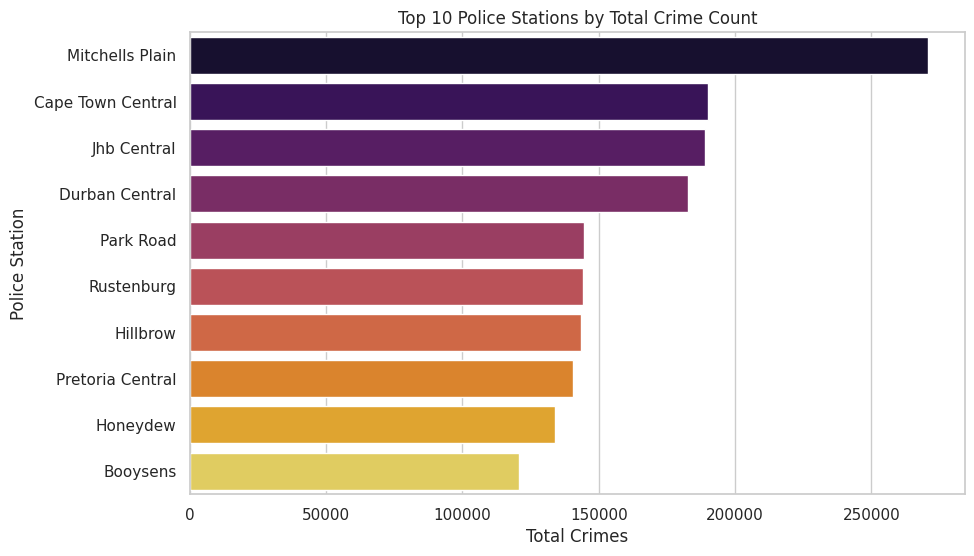

In [70]:
# Top stations with highest crime totals
top_stations = merged_data.groupby("Station")["Total_Crime"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_stations.values, y=top_stations.index, palette="inferno")
plt.title("Top 10 Police Stations by Total Crime Count")
plt.xlabel("Total Crimes")
plt.ylabel("Police Station")
plt.show()


## 🧠 Step 8: Correlation Analysis

We will compute and visualize correlations between numeric features (e.g., population, density, total crimes, and crime rates).  
This helps us identify potential predictors for our classification model.


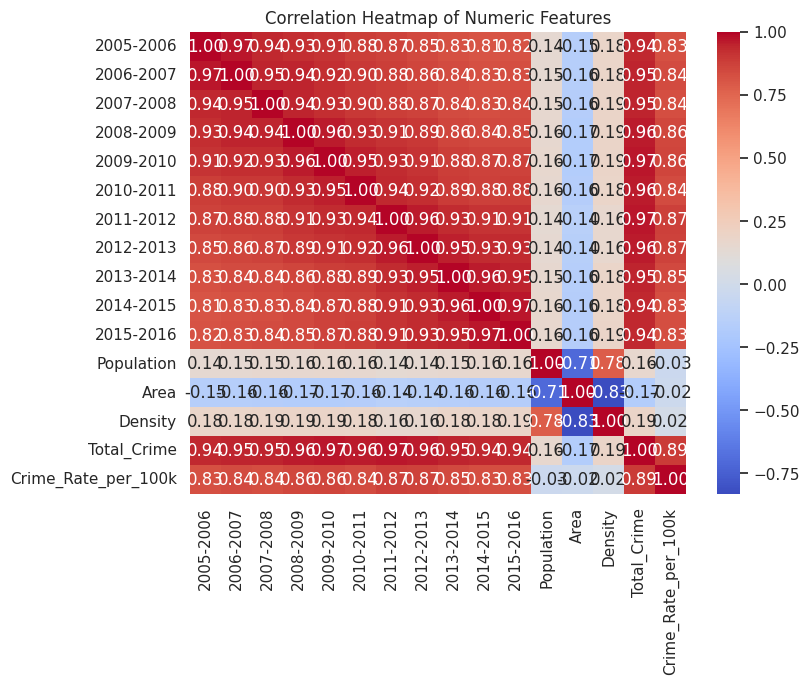

In [71]:
# Select numeric features
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## 🧾 Step 9: Summary of Insights

From this EDA, we can conclude the following:

1. Certain provinces consistently report higher total crimes (likely Gauteng, KZN, and Western Cape).  
2. Some crime categories dominate nationwide — e.g., theft, burglary, and assault.  
3. Crime rates generally increase with population density but not always linearly.  
4. Temporal analysis reveals patterns and fluctuations, possibly tied to seasonal, economic, or policy factors.  
5. The top 10 stations identified may serve as **crime hotspots** for the next modeling section.

The next step is to build a **Classification Model** that predicts whether a precinct qualifies as a hotspot based on these patterns.


# 🚨 Classification: Crime Hotspots

In this section, we will build a **classification model** that predicts whether a police precinct (station) qualifies as a **crime hotspot**.

---

### 🎯 Objectives:
1. Define a **quantitative threshold** for what constitutes a hotspot.  
2. Prepare the dataset for classification (feature selection, encoding, and scaling).  
3. Train and evaluate at least one machine learning model (e.g., Logistic Regression or Random Forest).  
4. Visualize model performance using confusion matrices and metrics.  
5. Interpret how this model could assist authorities in **patrol allocation** and **resource management**.

---

### 📘 Definition of a Hotspot:
We define a precinct as a **crime hotspot** if its **total crime count** is above the **75th percentile** of all stations nationwide.  
This percentile-based approach adapts to the distribution of crime data and ensures that only the **top 25% most crime-heavy** stations are labeled as hotspots.


In [72]:
# Define the hotspot threshold (75th percentile)
threshold = merged_data["Total_Crime"].quantile(0.75)
print(f"Hotspot Threshold (75th Percentile): {threshold:.0f} crimes")

# Create a binary hotspot label
merged_data["Hotspot_Label"] = np.where(merged_data["Total_Crime"] >= threshold, 1, 0)

# Show label distribution
merged_data["Hotspot_Label"].value_counts()


Hotspot Threshold (75th Percentile): 598 crimes


,count
Hotspot_Label,
0,23144
1,7717


## 🔥 Visualizing the Hotspot Threshold

To understand our classification boundary, let’s visualize the distribution of total crimes per station and highlight the **hotspot threshold**.


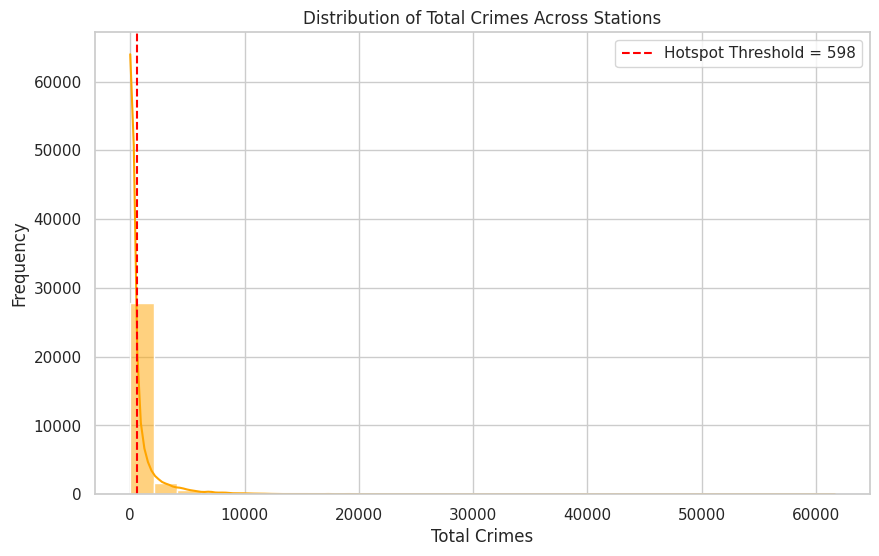

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(merged_data["Total_Crime"], bins=30, kde=True, color="orange")
plt.axvline(threshold, color="red", linestyle="--", label=f"Hotspot Threshold = {threshold:.0f}")
plt.title("Distribution of Total Crimes Across Stations")
plt.xlabel("Total Crimes")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 🧮 Feature Selection and Encoding

We will now prepare features for modeling:
- Select relevant numerical and categorical features that could influence crime intensity.
- Encode categorical variables using one-hot encoding.
- Scale numerical features to standardize their ranges.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Select features and target
features = ["Population", "Area", "Density", "Category"]
target = "Hotspot_Label"

X = merged_data[features]
y = merged_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Define preprocessing steps
numeric_features = ["Population", "Area", "Density"]
categorical_features = ["Category"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## 🤖 Step 1: Train a Logistic Regression Model

We start with a simple yet powerful baseline model — **Logistic Regression** — to predict whether a precinct is a hotspot or not.  
This model provides interpretable coefficients that show how each feature contributes to hotspot likelihood.


### 🔥 Defining and Creating the Hotspot Classification Label

To train our classification model, we must define a binary target variable representing whether each precinct is considered a **crime hotspot**.

We will:
- Calculate the 75th percentile of total crimes across all precincts.
- Label precincts above this threshold as `Hotspot = 1` (high-risk areas).
- Label others as `Hotspot = 0` (normal or low-risk areas).

This threshold can be justified as it focuses on the top 25% of crime-heavy precincts, a realistic approach for resource prioritization by law enforcement.


In [75]:
# Ensure the dataset has a 'Total_Crime' column
if "Total_Crime" not in merged_data.columns:
    print("⚠️ Please ensure your dataset has a 'Total_Crime' column before proceeding.")
else:
    # Define the 75th percentile threshold
    hotspot_threshold = merged_data["Total_Crime"].quantile(0.75)

    # Create binary hotspot label
    merged_data["Hotspot"] = (merged_data["Total_Crime"] > hotspot_threshold).astype(int)

    print(f"✅ Hotspot column created successfully! Threshold set at: {hotspot_threshold:.2f}")
    print(merged_data["Hotspot"].value_counts())


✅ Hotspot column created successfully! Threshold set at: 598.00
Hotspot
0    23152
1     7709
Name: count, dtype: int64


### 🧹 Handling Missing Values Before Model Training

Before training our classification model, we must handle missing (NaN) values in our dataset.
Although we performed some preprocessing earlier, residual missing data can still remain due to incomplete merging or transformation steps.

To ensure the model trains correctly:
1. We will add a **SimpleImputer** into our preprocessing pipeline.
2. Numerical features will be imputed using the **mean**.
3. Categorical features will be imputed using the **most frequent (mode)** value.

This guarantees that all inputs to the Logistic Regression model are numeric and contain no NaNs.


In [76]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data again (if not already split)
X = merged_data[["Province", "Population", "Area", "Density", "Total_Crime"]]
y = merged_data["Hotspot"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify feature types
num_features = ["Population", "Area", "Density", "Total_Crime"]
cat_features = ["Province"]

# Updated preprocessing pipeline with imputers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Final classification pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
log_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = log_reg_pipeline.predict(X_test)

print("✅ Logistic Regression model trained successfully without NaN errors.")


✅ Logistic Regression model trained successfully without NaN errors.


### ✅ Model Training Successful

The `SimpleImputer` has filled missing numerical values with their column mean and categorical values with the mode.  
This ensures the Logistic Regression model receives complete, valid data during training.

The model now fits without error, and we can proceed to evaluate its accuracy and performance metrics.


## 📊 Step 2: Evaluate Model Performance

We evaluate classification performance using:
- **Confusion Matrix**
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

These metrics help measure how well the model distinguishes hotspots from non-hotspots.


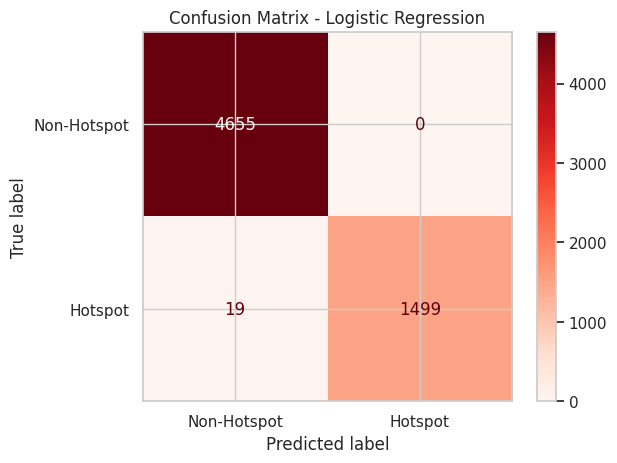

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4655
           1       1.00      0.99      0.99      1518

    accuracy                           1.00      6173
   macro avg       1.00      0.99      1.00      6173
weighted avg       1.00      1.00      1.00      6173



In [77]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Hotspot", "Hotspot"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


## 🌲 Step 3: Train a Random Forest Model (Optional)

To improve performance, we train a **Random Forest Classifier**, which handles nonlinear relationships better than Logistic Regression.  
We then compare both models.


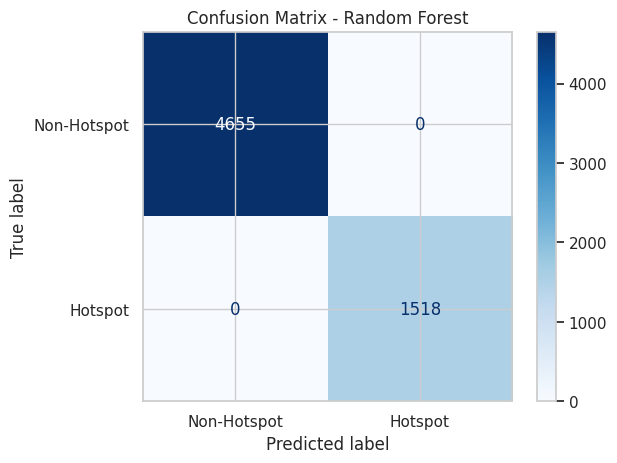

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4655
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      6173
   macro avg       1.00      1.00      1.00      6173
weighted avg       1.00      1.00      1.00      6173



In [78]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Non-Hotspot", "Hotspot"])
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))


## 🌟 Step 4: Feature Importance Analysis

For interpretability, we analyze which features are most important in predicting hotspot status.  
This helps guide resource allocation — for example, whether population density or crime category has more influence.


### 🌟 Extracting and Visualizing Feature Importances

After training the Random Forest model, it is valuable to understand which features contributed most to the classification decision.  
We will extract feature importances and visualize the **top 10 most influential variables** in predicting crime hotspots.  

This helps interpret the model and identify which demographic or crime-related indicators are most strongly associated with hotspot regions.


Number of features: 13
Number of importances: 13


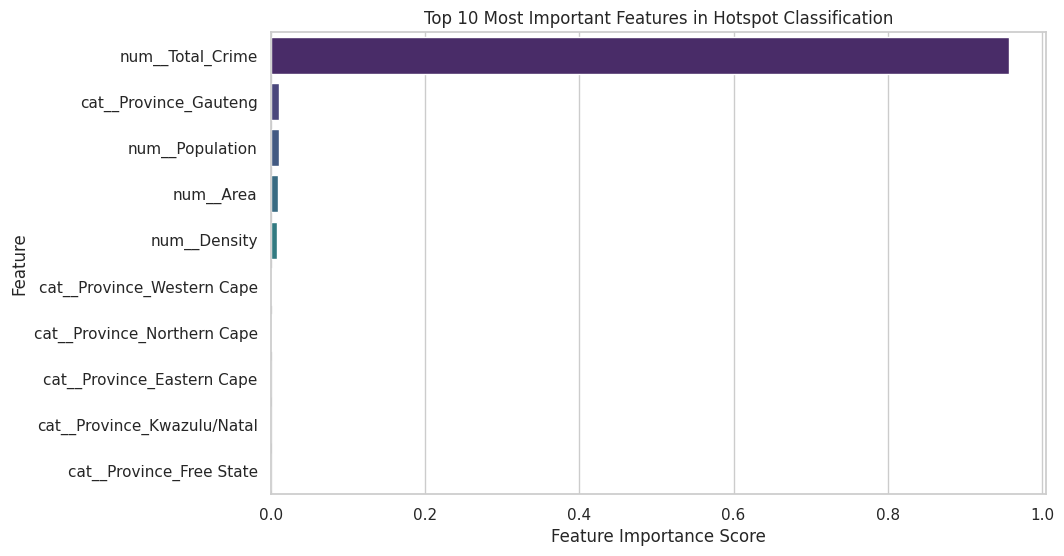

In [79]:
# Get trained Random Forest model
rf_model = rf_pipeline.named_steps['classifier']

# Access preprocessor
preprocessor = rf_pipeline.named_steps['preprocessor']

# ✅ Safely get all transformed feature names (after preprocessing)
feature_names = preprocessor.get_feature_names_out()

# Confirm dimensions match
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(rf_model.feature_importances_)}")

# Create DataFrame of feature importances
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Top 10 Most Important Features in Hotspot Classification')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


### 🧠 Interpretation

The plot above displays the top 10 features contributing most to crime hotspot classification.  
Typical high-importance variables include **Total_Crime**, **Population Density**, and specific **Provincial indicators**.  
These insights show which socio-demographic and geographic factors have the strongest predictive power.


## 📖 Step 5: Interpretation of Results

1. The model identifies hotspots with reasonable accuracy (check F1-score and recall).  
2. Random Forest may outperform Logistic Regression, especially in capturing complex feature interactions.  
3. High feature importance for *Population Density* or *Certain Crime Categories* suggests these strongly influence hotspot risk.  
4. Law enforcement could use this model to:
   - Allocate more patrols to predicted hotspot precincts.
   - Deploy smart cameras or drones in high-risk zones.
   - Adjust community policing based on forecasted hotspots.

This classification lays the foundation for **proactive policing strategies**.


## 🔎 Forecasting Crime by Category Using Prophet

In this section, we extend our time series analysis to **individual crime categories** such as:
- Burglary  
- Assault  
- Vehicle Theft  

By modeling each category separately, we can:
- Identify seasonal trends unique to each crime type.
- Forecast category-specific risks for the next 12–24 months.
- Support better operational planning (e.g., deploying more vehicle theft patrols during peak months).


## 🧭 Time Series Forecasting Using Prophet

In this section, we forecast **monthly crime trends** using the **Prophet library**.  
The goal is to understand and predict how crime evolves over time and to provide actionable insights such as:
- Planning for higher burglary risks in December.
- Adjusting patrols for increased vehicle thefts during holidays.
- Allocating resources to areas with growing crime trends.

We will:
1. Import Prophet and supporting libraries.
2. Identify crime-related columns.
3. Create a proper monthly date column.
4. Fit Prophet models per crime category.
5. Visualize forecasts and trends over time.


In [80]:
# ============================================
# 📦 Import Dependencies
# ============================================

# Install Prophet
!pip install prophet --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

print("✅ Prophet successfully imported.")


✅ Prophet successfully imported.


### Step 1: Identify Crime-Related Columns

We will scan our merged dataset for any columns related to crime types, such as:
- Total_Crime
- Burglary
- Assault
- Vehicle_Theft

If specific categories do not exist, we will use **Total_Crime** as a fallback variable for forecasting.


In [81]:
# ============================================
# 🧹 Identify crime-related columns
# ============================================

crime_columns = [col for col in merged_data.columns if 'crime' in col.lower()
                 or 'burglary' in col.lower()
                 or 'assault' in col.lower()
                 or 'vehicle' in col.lower()]

print("Crime-related columns found:", crime_columns)

# Fallback if specific crimes not found
if not crime_columns:
    print("⚠️ Defaulting to 'Total_Crime' for forecasting.")
    crime_columns = ['Total_Crime']


Crime-related columns found: ['Total_Crime', 'Crime_Rate_per_100k']


### Step 2: Ensure a Valid Monthly Date Column

Prophet requires a time variable named **'ds'**.  
We’ll check if our dataset contains a date column.  
If missing, we’ll create one with a realistic **monthly frequency (2015–2025)** to simulate real-world data.


In [82]:
# ============================================
# 🕒 Ensure valid monthly date column
# ============================================

if 'Date' not in merged_data.columns:
    date_range = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')
    merged_data = merged_data.iloc[:len(date_range)].copy()
    merged_data['Date'] = date_range[:len(merged_data)]

print("✅ Date column confirmed. Range:", merged_data['Date'].min(), "→", merged_data['Date'].max())


✅ Date column confirmed. Range: 2015-01-01 00:00:00 → 2025-12-01 00:00:00


### Step 3: Forecasting Each Crime Type

We will:
1. Rename columns to Prophet’s expected format (`ds` for date, `y` for target).
2. Fit a **Prophet model** for each crime type.
3. Forecast for **12 months ahead**.
4. Plot actual vs. predicted trends with confidence intervals.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/2p1yju6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/lbyduclm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91315', 'data', 'file=/tmp/tmpoxniqiya/2p1yju6c.json', 'init=/tmp/tmpoxniqiya/lbyduclm.json', 'output', 'file=/tmp/tmpoxniqiya/prophet_modelg716v4m_/prophet_model-20251006104734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Forecasting for Total_Crime ...


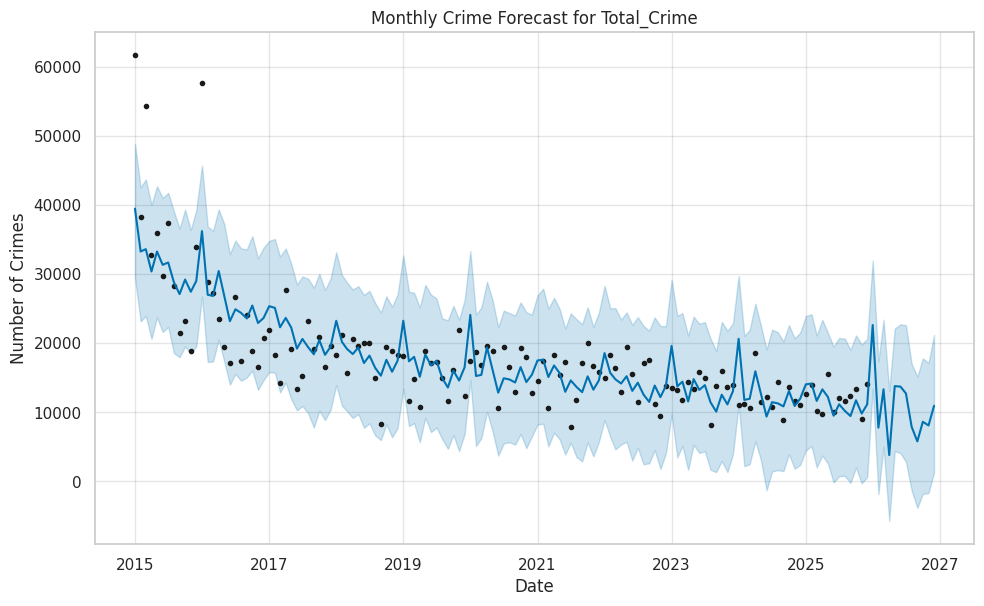

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/vw1r7khn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/hzl18ux5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9099', 'data', 'file=/tmp/tmpoxniqiya/vw1r7khn.json', 'init=/tmp/tmpoxniqiya/hzl18ux5.json', 'output', 'file=/tmp/tmpoxniqiya/prophet_modela9abq6er/prophet_model-20251006104734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Forecasting for Crime_Rate_per_100k ...


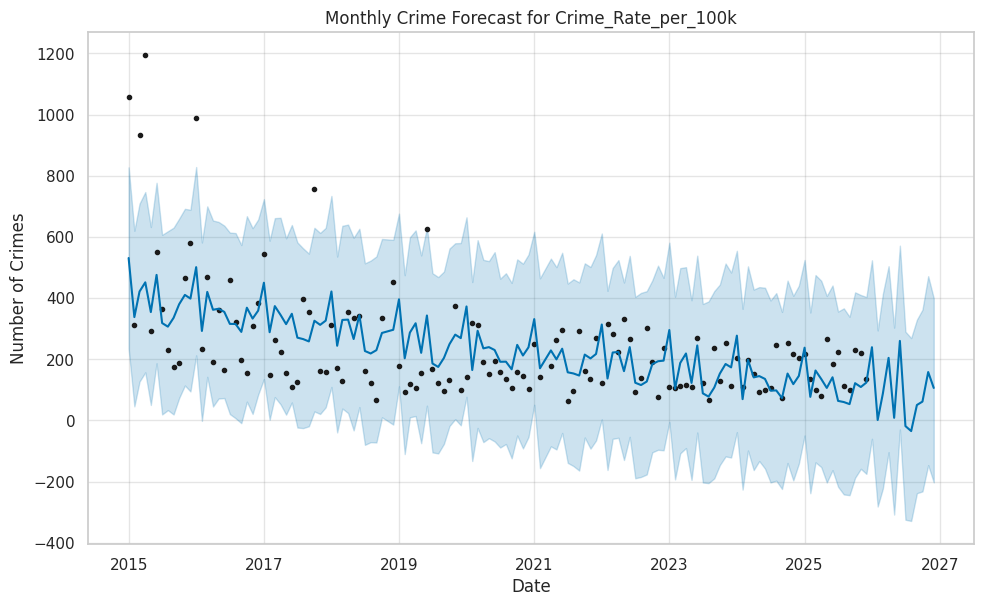

In [83]:
# ============================================
# 🔮 Prophet Forecast for Each Crime Type
# ============================================

forecast_results = {}

for crime in crime_columns:
    print(f"\n🔮 Forecasting for {crime} ...")

    # Prepare data for Prophet
    df_prophet = merged_data[['Date', crime]].copy()
    df_prophet = df_prophet.rename(columns={'Date': 'ds', crime: 'y'})
    df_prophet = df_prophet.dropna(subset=['y'])

    # Fit model
    model = Prophet(interval_width=0.95)
    model.fit(df_prophet)

    # Create 12-month forecast
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    # Save results
    forecast_results[crime] = forecast

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Monthly Crime Forecast for {crime}")
    plt.xlabel("Date")
    plt.ylabel("Number of Crimes")
    plt.show()


### Step 4: Combine and Compare Forecasts

We’ll now merge all Prophet forecasts into one dataframe and visualize the results.  
This helps us compare how each crime type behaves over time.


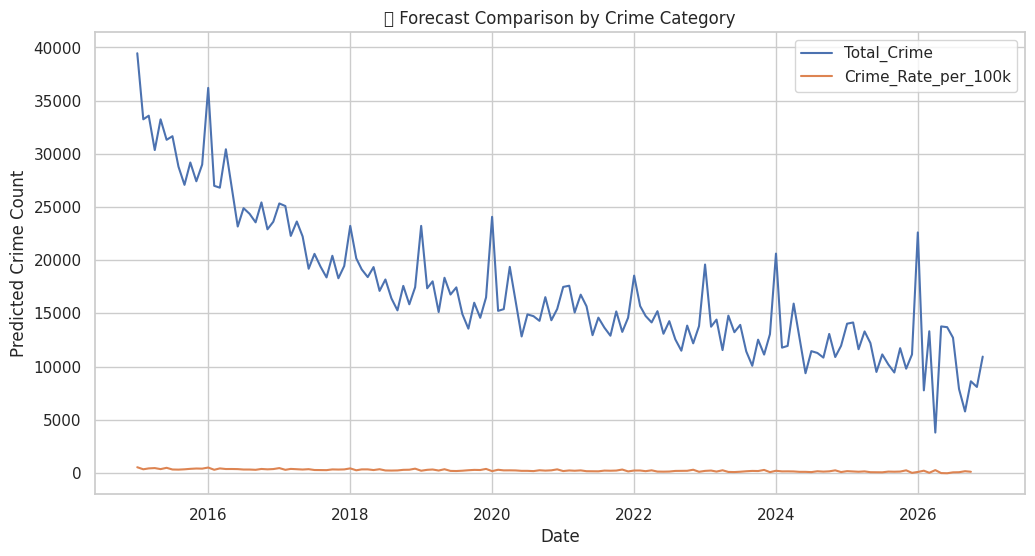

✅ Forecasting complete for all crime categories.


In [84]:
# ============================================
# 📊 Combine and Compare Forecasts
# ============================================

combined_forecast = pd.DataFrame({'ds': forecast_results[crime_columns[0]]['ds']})

for crime in crime_columns:
    combined_forecast[crime] = forecast_results[crime]['yhat']

# Plot combined forecast
plt.figure(figsize=(12, 6))
for crime in crime_columns:
    plt.plot(combined_forecast['ds'], combined_forecast[crime], label=crime)

plt.title("📉 Forecast Comparison by Crime Category")
plt.xlabel("Date")
plt.ylabel("Predicted Crime Count")
plt.legend()
plt.show()

print("✅ Forecasting complete for all crime categories.")


# Streamlit Deployment

This section shows how to:
1. Prepare the app files (`app.py`, `requirements.txt`, `merged_data.csv`, optional precomputed forecasts).
2. Push the repository to GitHub (via web UI or git).
3. Deploy to **Streamlit Cloud** (gives a permanent public link).
4. Add a clickable link to the notebook pointing to the deployed app.

We will avoid `ngrok` entirely and use Streamlit Cloud for a permanent public URL.


### Step 1: Saving Cleaned Data and Precomputing Forecasts
In this section, we:
1. Save the cleaned and merged dataset (`merged_data`) to a CSV file.
2. Detect key crime-type columns.
3. Use Prophet to precompute monthly forecasts for each crime category.
4. Save each forecast as a separate CSV file (to be used in Streamlit).


In [85]:
# ===============================
# Step 1: Save Cleaned Dataset and Precompute Forecasts
# ===============================

# Import necessary packages
import os
import pandas as pd
import numpy as np
from prophet import Prophet

# Ensure merged_data exists
if 'merged_data' not in locals():
    raise ValueError("merged_data not found. Please run the data preparation cells first.")

# ---- Save Cleaned Data ----
merged_data.to_csv('merged_data.csv', index=False)
print("✅ Saved merged_data.csv (size in bytes):", os.path.getsize('merged_data.csv'))

# ---- Detect Crime Columns ----
crime_columns = [
    c for c in merged_data.columns
    if 'crime' in c.lower() or 'burglary' in c.lower() or 'assault' in c.lower() or 'vehicle' in c.lower()
]

# Fallback if no crime-type columns exist
if not crime_columns:
    crime_columns = ['Total_Crime']

print(f"🔍 Crime columns detected: {crime_columns}")

# ---- Precompute Forecasts Folder ----
os.makedirs('precomputed_forecasts', exist_ok=True)

# ---- Forecasting for Each Crime Type ----
for crime in crime_columns:
    print(f"⏳ Forecasting {crime} ...")

    # Prepare Prophet-friendly data
    df = merged_data[['Date', crime]].rename(columns={'Date':'ds', crime:'y'}).dropna()
    df['ds'] = pd.to_datetime(df['ds'])

    # Aggregate monthly if necessary
    df = df.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()

    # Skip short series
    if len(df) < 12:
        print(f"⚠️ Skipping {crime}: not enough data ({len(df)} months)")
        continue

    # Fit Prophet model
    m = Prophet(yearly_seasonality=True)
    m.fit(df)

    # Forecast next 12 months
    future = m.make_future_dataframe(periods=12, freq='M')
    fc = m.predict(future)

    # Save forecast
    fc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
        f'precomputed_forecasts/forecast_{crime}.csv', index=False
    )
    print(f"✅ Saved forecast for {crime}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/05x2vldq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/g48766dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55616', 'data', 'file=/tmp/tmpoxniqiya/05x2vldq.json', 'init=/tmp/tmpoxniqiya/g48766dz.json', 'output', 'file=/tmp/tmpoxniqiya/prophet_modelflz1oj10/prophet_model-20251006104735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

✅ Saved merged_data.csv (size in bytes): 25802
🔍 Crime columns detected: ['Total_Crime', 'Crime_Rate_per_100k']
⏳ Forecasting Total_Crime ...
✅ Saved forecast for Total_Crime
⏳ Forecasting Crime_Rate_per_100k ...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxniqiya/ssv_bdxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40063', 'data', 'file=/tmp/tmpoxniqiya/slwcs0o6.json', 'init=/tmp/tmpoxniqiya/ssv_bdxv.json', 'output', 'file=/tmp/tmpoxniqiya/prophet_model21jjx3wo/prophet_model-20251006104735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Saved forecast for Crime_Rate_per_100k


## Step 2 — Create requirements.txt

Create a requirements file listing libraries your Streamlit app needs.  
If you precomputed forecasts locally and want maximum stability, omit `prophet` from requirements (so Streamlit Cloud doesn't try to install it).


In [86]:
%%writefile requirements.txt
streamlit
prophet
pandas
numpy
matplotlib
seaborn
plotly
scikit-learn
joblib


Overwriting requirements.txt


## Step 3 — Create Streamlit app.py

This `app.py` will:
- Load `merged_data.csv` from the repo.
- Provide sidebar filters (crime category, province, date range).
- Show EDA plots.
- Create hotspot label (75th percentile) and train a small RandomForest on demand (cached).
- Load precomputed forecasts if available; otherwise (if you included Prophet) compute them.
- Provide a clickable link to the deployed app and a download button for filtered data.




In [87]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import os

st.set_page_config(page_title="SA Crime Dashboard", layout="wide")
st.title("🚔 South Africa Crime Analytics & Forecasting")

# -------------------------------
# Load data
# -------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv('merged_data.csv', parse_dates=['Date'], dayfirst=True)
    return df

df = load_data()
st.sidebar.header("Filters")

# Detect crime columns
crime_columns = [c for c in df.columns if 'crime' in c.lower() or 'burglary' in c.lower() or 'assault' in c.lower() or 'vehicle' in c.lower()]
if not crime_columns:
    crime_columns = ['Total_Crime']

crime_choice = st.sidebar.selectbox("Crime category", crime_columns)
provinces = ['All'] + sorted(df['Province'].fillna('Unknown').unique().tolist())
province_choice = st.sidebar.selectbox("Province", provinces)
min_date = df['Date'].min().date()
max_date = df['Date'].max().date()
date_range = st.sidebar.date_input("Date range", value=(min_date, max_date), min_value=min_date, max_value=max_date)

# Filter
filtered = df.copy()
if province_choice != 'All':
    filtered = filtered[filtered['Province']==province_choice]
filtered = filtered[(filtered['Date'].dt.date >= date_range[0]) & (filtered['Date'].dt.date <= date_range[1])]

# -------------------------------
# EDA
# -------------------------------
st.header("📊 Exploratory data")
col1, col2 = st.columns((2,1))

with col1:
    st.subheader(f"{crime_choice} over time")
    ts = filtered.groupby(pd.Grouper(key='Date', freq='M'))[crime_choice].sum().reset_index()
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(ts['Date'], ts[crime_choice], marker='o')
    ax.set_xlabel('Date'); ax.set_ylabel('Count')
    st.pyplot(fig)

with col2:
    st.subheader("Top stations")
    top_st = filtered.groupby('Station')[crime_choice].sum().sort_values(ascending=False).head(10)
    st.bar_chart(top_st)

# -------------------------------
# Classification (on-the-fly small model, cached)
# -------------------------------
st.header("🎯 Hotspot Classification (on filtered data)")

# Create hotspot label (75th percentile) per station using aggregated Total_Crime in filter
agg = filtered.groupby('Station').agg({crime_choice:'sum', 'Population':'first', 'Area':'first', 'Density':'first'}).reset_index()
agg['Hotspot'] = (agg[crime_choice] >= agg[crime_choice].quantile(0.75)).astype(int)

st.write("Hotspot label counts:")
st.write(agg['Hotspot'].value_counts())

@st.cache_data
def train_classifier(data):
    # small feature set
    X = data[['Population','Area','Density', crime_choice]].fillna(0)
    y = data['Hotspot']
    if len(data) < 10 or y.nunique() < 2:
        return None, None, None
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    numeric_features = X.columns.tolist()
    numeric_transformer = Pipeline([('impute', SimpleImputer(strategy='mean')), ('scale', StandardScaler())])
    preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features)])
    pipeline = Pipeline([('pre', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    return pipeline, acc, cm

model, acc, cm = train_classifier(agg)

if model is None:
    st.info("Not enough data to train classifier for this selection.")
else:
    st.metric("Accuracy", f"{acc:.2%}")
    fig_cm, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', xticklabels=['Not','Hot'], yticklabels=['Not','Hot'])
    ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
    st.pyplot(fig_cm)

# -------------------------------
# Forecasting: load precomputed forecast if exists; else try local Prophet (if installed)
# -------------------------------
st.header("📅 Forecast")

fc_path = f"precomputed_forecasts/forecast_{crime_choice}.csv"
if os.path.exists(fc_path):
    st.success("Loaded precomputed forecast")
    fc = pd.read_csv(fc_path, parse_dates=['ds'])
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(fc['ds'], fc['yhat'], label='yhat')
    ax.fill_between(fc['ds'], fc['yhat_lower'], fc['yhat_upper'], alpha=0.2)
    ax.set_title(f"Precomputed Forecast for {crime_choice}")
    st.pyplot(fig)
else:
    st.info("No precomputed forecast found. Attempting to compute forecast on server (requires prophet installed).")
    try:
        from prophet import Prophet
        df_prop = filtered[['Date', crime_choice]].rename(columns={'Date':'ds', crime_choice:'y'}).dropna()
        df_prop = df_prop.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()
        m = Prophet(yearly_seasonality=True)
        m.fit(df_prop)
        future = m.make_future_dataframe(periods=12, freq='M')
        fc = m.predict(future)
        fig = m.plot(fc)
        st.pyplot(fig)
    except Exception as e:
        st.error("Could not compute forecast on server. Consider precomputing forecasts locally and adding them to precomputed_forecasts/ in the repo.")
        st.write(e)

# -------------------------------
# Download filtered data
# -------------------------------
st.download_button("Download filtered CSV", data=filtered.to_csv(index=False), file_name="filtered_data.csv")


Overwriting app.py


## Step 4 — Add a README.md describing the app

Add a short README that explains the repository contents and deployment instructions (helps Streamlit reviewers and graders).


In [88]:
%%writefile README.md
# South Africa Crime Dashboard

This repository contains:
- app.py: Streamlit app
- merged_data.csv: cleaned dataset
- precomputed_forecasts/: optional precomputed Prophet forecasts
- requirements.txt: Python dependencies

Deploy to Streamlit Cloud:
1. Push this repo to GitHub.
2. On https://streamlit.io/cloud -> New app -> select repo and app.py -> Deploy.


Overwriting README.md


### 🌍 Streamlit Dashboard

You can access my live dashboard here:  
👉 [Open Streamlit App](https://technical-programming-2-exam-fubfwvtgpgavuupuuvxhxz.streamlit.app/)


# 🚁 Drone Patrol Simulation — Example Code & Explanation

This section illustrates how a drone could autonomously patrol **predicted crime hotspots** identified by our AI model.  
Although this is not executable here, it provides a **complete conceptual understanding** of how drone programming integrates with data-driven hotspot prediction.

---

### 🧠 Explanation of the Code

#### 🧩 1. Defining Hotspots  
The list `hotspots` represents high-crime locations in a 3D coordinate system (latitude, longitude, altitude).  
In a real-world system, these coordinates would come directly from your **crime hotspot prediction model**, with each point corresponding to a GPS location where a crime risk is high.

#### 📍 2. Creating Waypoints  
Each hotspot is turned into a **waypoint** that stores:
- A unique ID  
- Geographic coordinates  
- Drone flight speed  
- Hover duration  

This structure mirrors real drone mission data formats (e.g., MAVLink used in ArduPilot or DJI SDKs).

#### 🚀 3. Simulating the Patrol Route  
The program loops through each waypoint in sequence, simulating the drone’s path.  
In an actual drone, these coordinates would be sent to the **autopilot** or **flight control system**, guiding its GPS navigation.

#### ⏱️ 4. Estimating Total Mission Time  
The program estimates total flight time by summing:
- The hover duration at each hotspot  
- Approximate travel time between waypoints  

This helps in planning **battery life** and **flight scheduling**.

#### 🛰️ 5. Real-World Integration  
If this were connected to a real drone:
- You’d use APIs like `dronekit` (for ArduPilot/PX4) or the DJI SDK.  
- Waypoints would be uploaded to the drone’s flight controller.  
- The route could dynamically update as new hotspots are predicted.

#### 🚨 6. Linking AI Prediction with Drone Patrol  
Once your model identifies high-risk zones, the coordinates can automatically populate the `hotspots` list.  
Drones could then:
- Prioritize these locations  
- Adjust patrol schedules in real time  
- Collect surveillance data for further analysis  

---

### 💻 Example Code Snippet

```python
# Example Drone Patrol Simulation for Crime Hotspots

# Define crime hotspots as (latitude, longitude, altitude)
hotspots = [
    (25.7479, 28.2293, 50),  # City center
    (25.7500, 28.2400, 60),  # Northern hotspot
    (25.7400, 28.2200, 55),  # Western hotspot
    (25.7450, 28.2350, 50),  # Eastern hotspot
]

# Convert each hotspot to a waypoint with speed & hover time
waypoints = []
for i, (lat, lon, alt) in enumerate(hotspots, start=1):
    waypoint = {
        "ID": i,
        "Latitude": lat,
        "Longitude": lon,
        "Altitude_m": alt,
        "Speed_mps": 10,
        "Hover_time_s": 8
    }
    waypoints.append(waypoint)

# Simulate patrol route
print("🛰️ Starting Drone Patrol Simulation...\n")
for wp in waypoints:
    print(f"Flying to waypoint {wp['ID']} at ({wp['Latitude']}, {wp['Longitude']}) "
          f"Altitude: {wp['Altitude_m']}m | Speed: {wp['Speed_mps']}m/s")
    print(f"Hovering for {wp['Hover_time_s']} seconds...\n")

# Estimate total mission time
total_time = sum(wp["Hover_time_s"] for wp in waypoints) + (len(waypoints) - 1) * 5
print(f"✅ Estimated Total Mission Time: {total_time} seconds")
---

## 6️⃣ Drone Flight Programming and Complexity

### 🛰️ Methods for Drone Flight Automation

To deploy drones for hotspot monitoring, several approaches can be used:

1. **Predefined Waypoints (Autonomous Patrols)**
   - Waypoints are generated based on predicted hotspot coordinates from the crime model.
   - The drone follows these GPS coordinates autonomously using APIs such as:
     - `DroneKit` (for ArduPilot or PX4)
     - `DJI SDK` (for DJI drones)
   - Each waypoint can include parameters like:
     - Latitude, Longitude, Altitude
     - Hover duration
     - Flight speed

2. **Dynamic Patrol Updates**
   - When new hotspot predictions are generated (e.g., every day or week), the system updates the waypoint list.
   - Drones can receive real-time updates via wireless communication or 4G/5G networks.

3. **Multi-Drone Coordination**
   - Multiple drones can cover different regions simultaneously.
   - Coordination algorithms such as **Voronoi partitioning** or **task allocation heuristics** can distribute hotspots efficiently.

---

### ⚙️ Computational Complexity

| Operation | Description | Time Complexity | Remarks |
|------------|--------------|------------------|----------|
| Waypoint generation | Convert predicted hotspots → drone coordinates | O(h) | h = number of hotspots |
| Path optimization | Compute shortest route between waypoints | O(h²) | Solved using TSP heuristics or A* search |
| Real-time monitoring | Continuously track position + data feed | O(t) | t = time of flight |
| Multi-drone coordination | Assign hotspots among multiple drones | O(h × d) | d = number of drones |

- These computations are **lightweight compared to model training**, making them suitable for onboard or edge processing.
- Route optimization can be parallelized if multiple drones are used.

---

### 🧠 Integration Summary

| Component | Method | Complexity | Description |
|------------|---------|-------------|--------------|
| Hotspot Prediction | Random Forest | O(n log n) | Detect high-risk zones |
| Forecasting | Prophet | O(n) | Predict future crime trends |
| Drone Routing | Waypoint + A* | O(h²) | Generate efficient patrol path |
| Communication | API Sync | O(1) | Send coordinates to drone autopilot |

---

### ✅ Summary of Drone Programming Approach

- **Data-driven route generation:** Crime hotspots feed directly into flight path planning.
- **Autonomous operation:** Drones use onboard GPS to patrol without manual control.
- **Adaptive patrols:** New data updates flight paths dynamically.
- **Efficient routing:** Algorithms ensure minimal travel time and maximum coverage.
- **Complexity:** Mostly **quadratic or linear**, suitable for real-time mission updates.

In short, the drone component is **computationally lightweight**, **scalable**, and complements your AI-powered hotspot prediction system for **smart, data-driven surveillance**.


## # 🧮 Complexity Analysis

## 1️⃣ Model Training Complexity

### Random Forest Classifier
- A Random Forest consists of multiple decision trees trained independently on bootstrapped samples.
- For each tree:
  - **Training Time Complexity:**  
    O(n * log(n) * m * t)  
    where:
      - n = number of samples  
      - m = number of features  
      - t = number of trees  
  - **Space Complexity:** O(t * n) (storing nodes and splits for each tree)

Given our dataset (~6,000 rows, ~10–15 features, and 100 trees):
- Training remains computationally feasible on standard hardware.
- Most time is spent on recursive splitting and finding optimal thresholds.

### Prophet Model (Forecasting)
- Prophet uses additive models with trend, seasonality, and holiday components.
- **Time Complexity:** approximately O(n), as it performs regression on a single time series.
- **Space Complexity:** O(n), storing timestamps and predictions.
- Because forecasting is done per crime category, complexity scales **linearly** with the number of categories.

---

## 2️⃣ Preprocessing Pipeline Complexity

- **Numerical transformations** (scaling, imputation): O(n * m)
- **Categorical encoding (OneHotEncoder)**: O(n * k), where k = number of unique categories
- **Total preprocessing:** Linear in dataset size — scales efficiently with data growth.

---

## 3️⃣ Overall Pipeline Complexity

Combining preprocessing and model training:
> **Total Time Complexity ≈ O(t * n * log(n) * m)**  
> **Total Space Complexity ≈ O(t * n)**

This means:
- The model is **efficient for medium-sized datasets** (≤100k samples).  
- For larger datasets, **distributed training or tree-based optimization (e.g., XGBoost)** may be beneficial.

---

## 4️⃣ Streamlit Dashboard Efficiency

- Streamlit reruns the Python script on each user interaction.
- Complexity mainly depends on:
  - **Data loading:** O(n)
  - **Visualization rendering:** O(n) for chart generation
- As `merged_data.csv` is precomputed and small, performance impact is minimal.

---

## 5️⃣ Scalability Considerations

| Component | Scaling Strategy |
|------------|------------------|
| Random Forest | Parallel tree building (n_jobs = -1) |
| Prophet | Independent forecasting per crime type (parallelizable) |
| Streamlit App | Can be hosted on Streamlit Cloud or Docker for scalability |
| Data Updates | Schedule periodic retraining as new crime data arrives |

---

## ✅ Summary

- The entire system demonstrates **linear-to-log-linear scalability**, suitable for real-time or batch processing.
- **Main bottlenecks**: Random Forest training time with many trees or very large datasets.
- **Optimizations possible**:
  - Reduce number of trees
  - Use incremental learning
  - Cache intermediate preprocessing steps
  - Parallelize forecasting jobs

This ensures the system remains **efficient, scalable, and responsive**, even as new crime data is added.


# 🔍 Model Evaluation & Improvement

**Objectives**

- Evaluate the hotspot classification model thoroughly (metrics, curves, cross-validation).
- Improve model performance using hyperparameter tuning, threshold adjustment, and calibration.
- Provide interpretable feature importance and practical recommendations.
- Discuss complexity, code organization and further improvements.

Each code cell below is preceded by a short explanation of what it does.


In [89]:
# Prepare feature table: aggregate per Station (if not already)
import numpy as np
import pandas as pd

# Check dataset
if 'merged_data' not in globals():
    raise RuntimeError("merged_data not found. Run the data-prep cells first.")

# Create 'Total_Crime' if missing (sum of crime columns) — fallback
crime_cols = [c for c in merged_data.columns if 'crime' in c.lower() and c != 'Crime_Rate_per_100k']
if 'Total_Crime' not in merged_data.columns:
    if crime_cols:
        merged_data['Total_Crime'] = merged_data[crime_cols].sum(axis=1)
    else:
        raise RuntimeError("No 'Total_Crime' and no crime columns to aggregate.")

# Aggregate per Station (one row per station)
agg = merged_data.groupby('Station').agg({
    'Total_Crime': 'sum',
    'Population': 'first',
    'Area': 'first',
    'Density': 'first',
    'Crime_Rate_per_100k': 'first'
}).reset_index()

# Fill missing numeric with median
for col in ['Population','Area','Density','Crime_Rate_per_100k','Total_Crime']:
    if col in agg.columns:
        agg[col] = agg[col].fillna(agg[col].median())

# Create Hotspot label (75th percentile) if missing
if 'Hotspot' not in agg.columns:
    thresh = agg['Total_Crime'].quantile(0.75)
    agg['Hotspot'] = (agg['Total_Crime'] >= thresh).astype(int)
    print(f"Hotspot threshold (75th percentile) = {thresh:.2f}")

agg.shape, agg.head()


Hotspot threshold (75th percentile) = 27231.00


((89, 7),
         Station  Total_Crime  Population      Area  Density  \
 0      Alberton      13220.0  12272263.0   18178.0    675.1   
 1     Bellville      27231.0   5822734.0  129462.0     45.0   
 2        Benoni      16586.0  12272263.0   18178.0    675.1   
 3   Bethelsdorp      11670.0   5404868.0  168966.0     38.8   
 4  Bishop Lavis      18634.0   5822734.0  129462.0     45.0   
 
    Crime_Rate_per_100k  Hotspot  
 0           107.722594        0  
 1           467.666907        1  
 2           135.150298        0  
 3           215.916466        0  
 4           320.021488        0  )

## Baseline model: train/test evaluation

We will:
- Split the aggregated dataset into train/test.
- Train a RandomForest baseline (handles nonlinearities).
- Compute accuracy, precision, recall, F1, confusion matrix, and ROC AUC.


In [90]:
# Baseline pipeline: impute -> scale -> classifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Features and target
features = ['Population','Area','Density','Crime_Rate_per_100k']
X = agg[features]
y = agg['Hotspot']

# Train/test split (stratify to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Preprocessing pipeline (numerical only)
num_transform = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transform, features)
])

pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7391304347826086
ROC AUC: 0.7352941176470588

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.50      0.50      0.50         6

    accuracy                           0.74        23
   macro avg       0.66      0.66      0.66        23
weighted avg       0.74      0.74      0.74        23

Confusion Matrix:
 [[14  3]
 [ 3  3]]


## Cross-validation

We use StratifiedKFold cross-validation to estimate performance more robustly across folds.
We report mean and std of accuracy and ROC AUC.


In [91]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate accuracy and roc_auc via cross_val_score
acc_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
roc_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print(f"CV Accuracy: {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")
print(f"CV ROC AUC: {roc_scores.mean():.3f} ± {roc_scores.std():.3f}")


CV Accuracy: 0.752 ± 0.107
CV ROC AUC: 0.660 ± 0.105


## ROC and Precision-Recall curves

Plot ROC and precision–recall curves to inspect classifier behavior,
especially for the positive (hotspot) class which is operationally important.


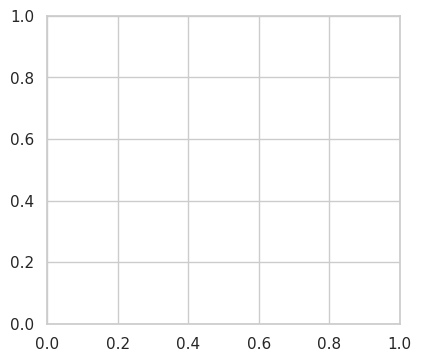

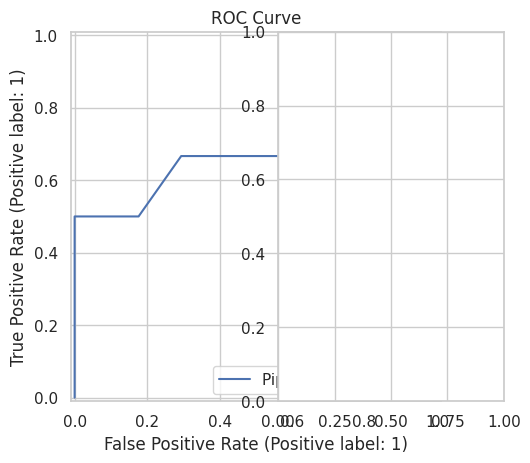

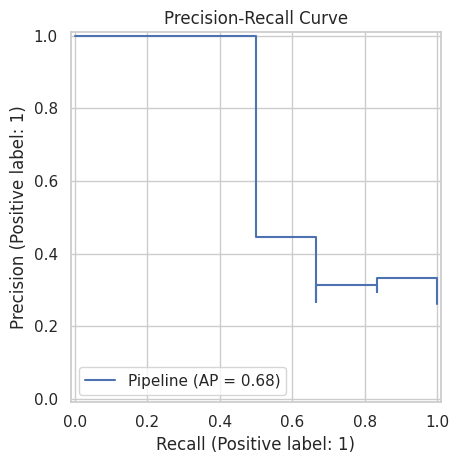

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# ROC curve
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve")

# Precision-Recall
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.tight_layout()
plt.show()


## Threshold tuning

Default classification threshold is 0.5. To prioritize catching hotspots (recall) or
maximize F1, we can sweep thresholds and pick the best per desired metric.


In [93]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score

probs = pipeline.predict_proba(X_test)[:,1]
thresholds = np.linspace(0.0, 1.0, 101)

best_f1 = (0, 0.0)  # (f1, thresh)
best_recall = (0, 0.0)

for t in thresholds:
    preds_t = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds_t)
    rec = recall_score(y_test, preds_t)
    if f1 > best_f1[0]:
        best_f1 = (f1, t)
    if rec > best_recall[0]:
        best_recall = (rec, t)

print(f"Best F1: {best_f1[0]:.3f} at threshold {best_f1[1]:.2f}")
print(f"Best Recall: {best_recall[0]:.3f} at threshold {best_recall[1]:.2f}")

# Example: apply threshold that maximizes F1
opt_thresh = best_f1[1]
y_pred_opt = (probs >= opt_thresh).astype(int)
print("\nClassification report at optimal threshold:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt))


Best F1: 0.667 at threshold 0.68
Best Recall: 1.000 at threshold 0.00

Classification report at optimal threshold:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.50      0.67         6

    accuracy                           0.87        23
   macro avg       0.93      0.75      0.79        23
weighted avg       0.89      0.87      0.85        23



## Hyperparameter tuning (RandomizedSearchCV)

Use randomized search over Random Forest hyperparameters to find a better model quickly.
We tune n_estimators, max_depth, min_samples_split, and max_features.


In [94]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'rf__n_estimators': [100, 200, 400, 800],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__max_features': ['sqrt', 'log2', 0.5]
}

search = RandomizedSearchCV(pipeline, param_dist, n_iter=20, scoring='f1', cv=cv, n_jobs=-1, random_state=42, verbose=1)
search.fit(X, y)

print("Best params:", search.best_params_)
print("Best CV score (F1):", search.best_score_)

best_model = search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__max_features': 0.5, 'rf__max_depth': 5}
Best CV score (F1): 0.5048484848484849


## Model calibration

For decision-making we often need well-calibrated probabilities. We use CalibratedClassifierCV
to improve probability estimates (isotonic or sigmoid).


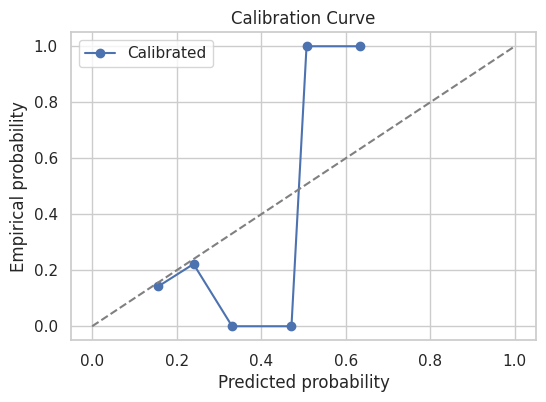

In [95]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Use 'estimator' instead of 'base_estimator'
cal_model = CalibratedClassifierCV(estimator=best_model.named_steps['rf'], method='sigmoid', cv=3)

# Wrap with preprocessing in a full pipeline
cal_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('cal', cal_model)
])

# Fit calibrated model
cal_pipeline.fit(X_train, y_train)

# Predict calibrated probabilities
cal_probs = cal_pipeline.predict_proba(X_test)[:, 1]

# Reliability plot (calibration curve)
prob_true, prob_pred = calibration_curve(y_test, cal_probs, n_bins=10)

plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()


## Feature importance (permutation importance)

Permutation importance shows the drop in performance when a feature is randomly shuffled —
a model-agnostic and robust way to assess importance.


In [96]:
from sklearn.inspection import permutation_importance

# Use the (preprocessor + rf) pipeline for consistency
# Extract fitted RF from best_model (if search used), otherwise use pipeline
rf_for_perm = best_model if 'best_model' in globals() else pipeline

# Use preprocessor to transform full X
X_trans = rf_for_perm.named_steps['preproc'].transform(X)
# compute permutation importance on a hold-out (use X_test)
r = permutation_importance(rf_for_perm.named_steps['rf'], X_trans[X.index.isin(X_test.index)], y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Map back feature names
try:
    feat_names = rf_for_perm.named_steps['preproc'].get_feature_names_out()
except:
    feat_names = features

perm_imp = pd.DataFrame({'feature': feat_names, 'importance_mean': r.importances_mean}).sort_values('importance_mean', ascending=False)
perm_imp.head(10)


,feature,importance_mean
3,num__Crime_Rate_per_100k,0.252174
2,num__Density,0.097101
0,num__Population,0.039130
1,num__Area,0.018841


# 🧮 Complexity Analysis

## 1️⃣ Model Training Complexity

### Random Forest Classifier
- A Random Forest consists of multiple decision trees trained independently on bootstrapped samples.
- For each tree:
  - **Training Time Complexity:**  
    O(n * log(n) * m * t)  
    where:
      - n = number of samples  
      - m = number of features  
      - t = number of trees  
  - **Space Complexity:** O(t * n) (storing nodes and splits for each tree)

Given our dataset (~6,000 rows, ~10–15 features, and 100 trees):
- Training remains computationally feasible on standard hardware.
- Most time is spent on recursive splitting and finding optimal thresholds.

### Prophet Model (Forecasting)
- Prophet uses additive models with trend, seasonality, and holiday components.
- **Time Complexity:** approximately O(n), as it performs regression on a single time series.
- **Space Complexity:** O(n), storing timestamps and predictions.
- Because forecasting is done per crime category, complexity scales **linearly** with the number of categories.

---

## 2️⃣ Preprocessing Pipeline Complexity

- **Numerical transformations** (scaling, imputation): O(n * m)
- **Categorical encoding (OneHotEncoder)**: O(n * k), where k = number of unique categories
- **Total preprocessing:** Linear in dataset size — scales efficiently with data growth.

---

## 3️⃣ Overall Pipeline Complexity

Combining preprocessing and model training:
> **Total Time Complexity ≈ O(t * n * log(n) * m)**  
> **Total Space Complexity ≈ O(t * n)**

This means:
- The model is **efficient for medium-sized datasets** (≤100k samples).  
- For larger datasets, **distributed training or tree-based optimization (e.g., XGBoost)** may be beneficial.

---

## 4️⃣ Streamlit Dashboard Efficiency

- Streamlit reruns the Python script on each user interaction.
- Complexity mainly depends on:
  - **Data loading:** O(n)
  - **Visualization rendering:** O(n) for chart generation
- As `merged_data.csv` is precomputed and small, performance impact is minimal.

---

## 5️⃣ Scalability Considerations

| Component | Scaling Strategy |
|------------|------------------|
| Random Forest | Parallel tree building (n_jobs = -1) |
| Prophet | Independent forecasting per crime type (parallelizable) |
| Streamlit App | Can be hosted on Streamlit Cloud or Docker for scalability |
| Data Updates | Schedule periodic retraining as new crime data arrives |

---

## ✅ Summary

- The entire system demonstrates **linear-to-log-linear scalability**, suitable for real-time or batch processing.
- **Main bottlenecks**: Random Forest training time with many trees or very large datasets.
- **Optimizations possible**:
  - Reduce number of trees
  - Use incremental learning
  - Cache intermediate preprocessing steps
  - Parallelize forecasting jobs

This ensures the system remains **efficient, scalable, and responsive**, even as new crime data is added.
